# Import Basic Packages

In [1]:
# Numpy & Pandas & Matplotlib % PIL
from PIL import Image as pil
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F
from keras.preprocessing.image import ImageDataGenerator

import pickle

C:\Users\yoonh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from torch_arrange import random_weight, zero_weight, flatten, check_accuracy, train

In [3]:
china = np.loadtxt('china.txt', dtype=int)
japan = np.loadtxt('japan.txt', dtype=int)
kor = np.loadtxt('kor.txt', dtype=int)

In [4]:
china = china.reshape(300,3,80,80)
japan = japan.reshape(241,3,80,80)
kor = kor.reshape(272,3,80,80)

In [5]:
len(china)

300

In [6]:
china[1]

array([[[ 92, 111, 139, ..., 200, 176, 148],
        [ 94, 115, 147, ..., 206, 177, 165],
        [110, 143, 154, ..., 211, 192, 164],
        ...,
        [255, 255, 252, ...,  45, 136, 247],
        [254, 253, 255, ...,  44,  59, 149],
        [254, 252, 217, ...,  47,  45,  62]],

       [[ 68,  82, 106, ..., 157, 135, 109],
        [ 67,  85, 112, ..., 160, 133, 124],
        [ 82, 111, 117, ..., 162, 145, 120],
        ...,
        [255, 255, 252, ...,  44, 136, 247],
        [254, 254, 255, ...,  42,  58, 148],
        [254, 252, 217, ...,  45,  44,  61]],

       [[ 60,  71,  91, ..., 141, 120,  97],
        [ 58,  72,  95, ..., 145, 120, 111],
        [ 70,  96,  98, ..., 148, 132, 109],
        ...,
        [255, 255, 252, ...,  51, 140, 248],
        [254, 254, 255, ...,  53,  65, 153],
        [254, 253, 218, ...,  57,  53,  68]]])

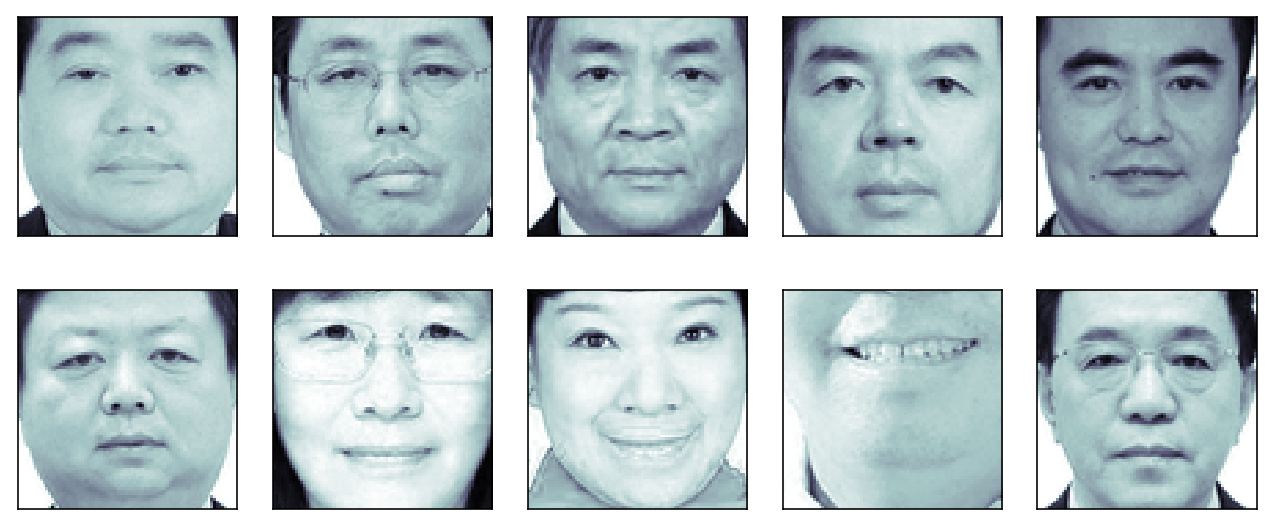

In [7]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(china)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        ax.imshow(china[k][0], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

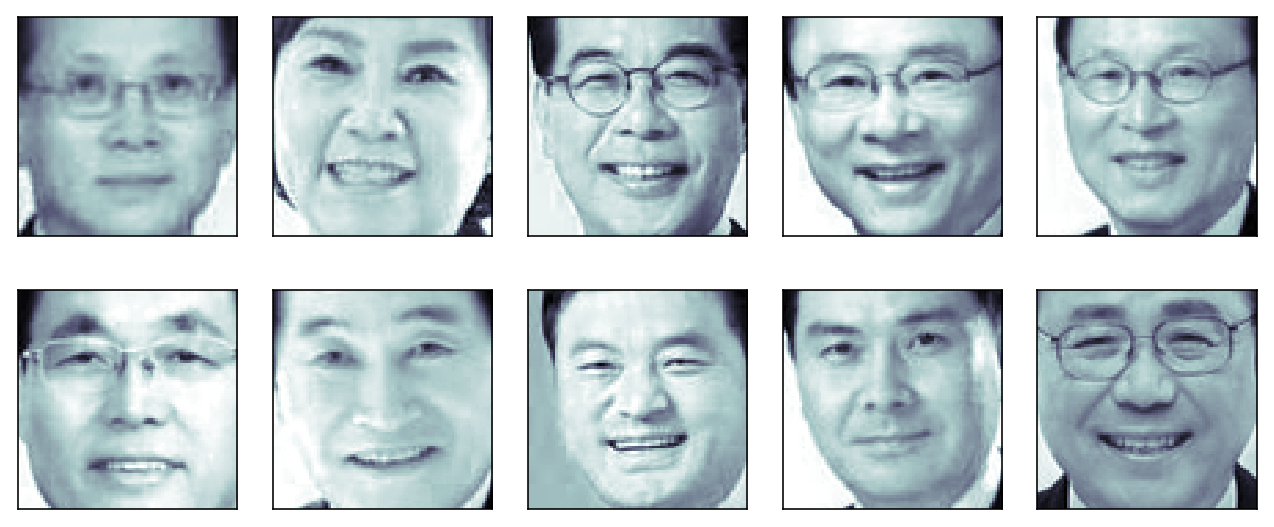

In [8]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(kor)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        ax.imshow(kor[k][0], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

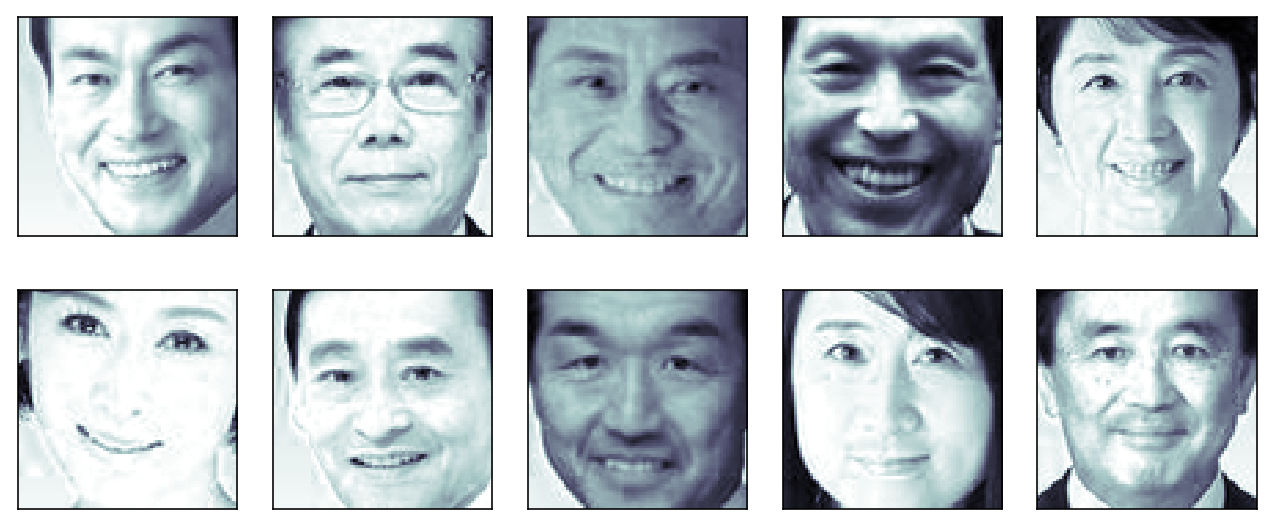

In [9]:
### N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(japan)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        ax.imshow(japan[k][0], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [10]:
answer_chn = np.zeros(shape = (300,3), )
answer_chn[:,0] = 1
answer_jpn = np.zeros(shape = (241,3), )
answer_jpn[:,1] = 1
answer_kor = np.zeros(shape = (272,3), )
answer_kor[:,2] = 1

In [11]:
y = np.vstack((answer_chn,answer_jpn,answer_kor))
y.shape

(813, 3)

In [12]:
x = np.vstack((china,japan,kor))
x.shape

(813, 3, 80, 80)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F
from keras.preprocessing.image import ImageDataGenerator

In [14]:
x.shape

(813, 3, 80, 80)

In [15]:
x = np.transpose(x, axes = (0,2,3,1))
x.shape

(813, 80, 80, 3)

# Data Augmentation

The shape of (X_train, X_test, y_train, y_test) are (731, 80, 80, 3) (82, 80, 80, 3) (731, 3) (82, 3)


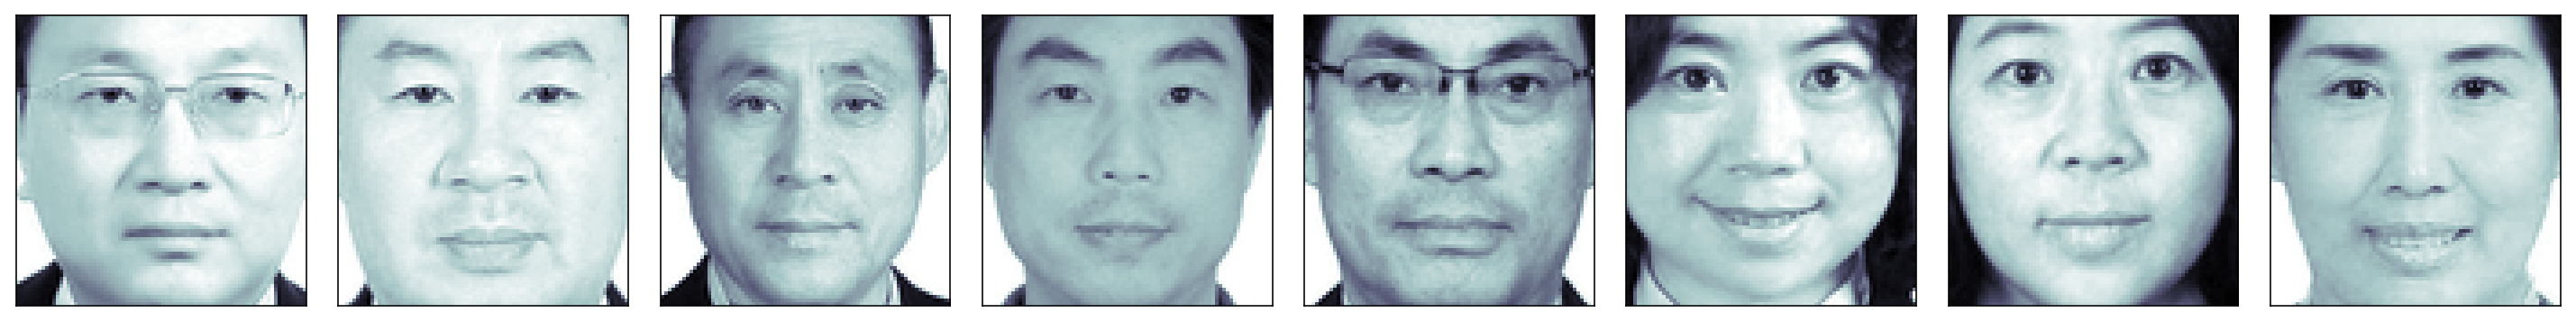

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

print('The shape of (X_train, X_test, y_train, y_test) are',X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X_train = X_train0[:, :, :, np.newaxis]
# X_test = X_test0[:, :, :, np.newaxis]
# Y_train = np_utils.to_categorical(y_train0, 40)
# Y_test = np_utils.to_categorical(y_test0, 40)

plt.figure(figsize=(20, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(x[i, :, :, 0], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

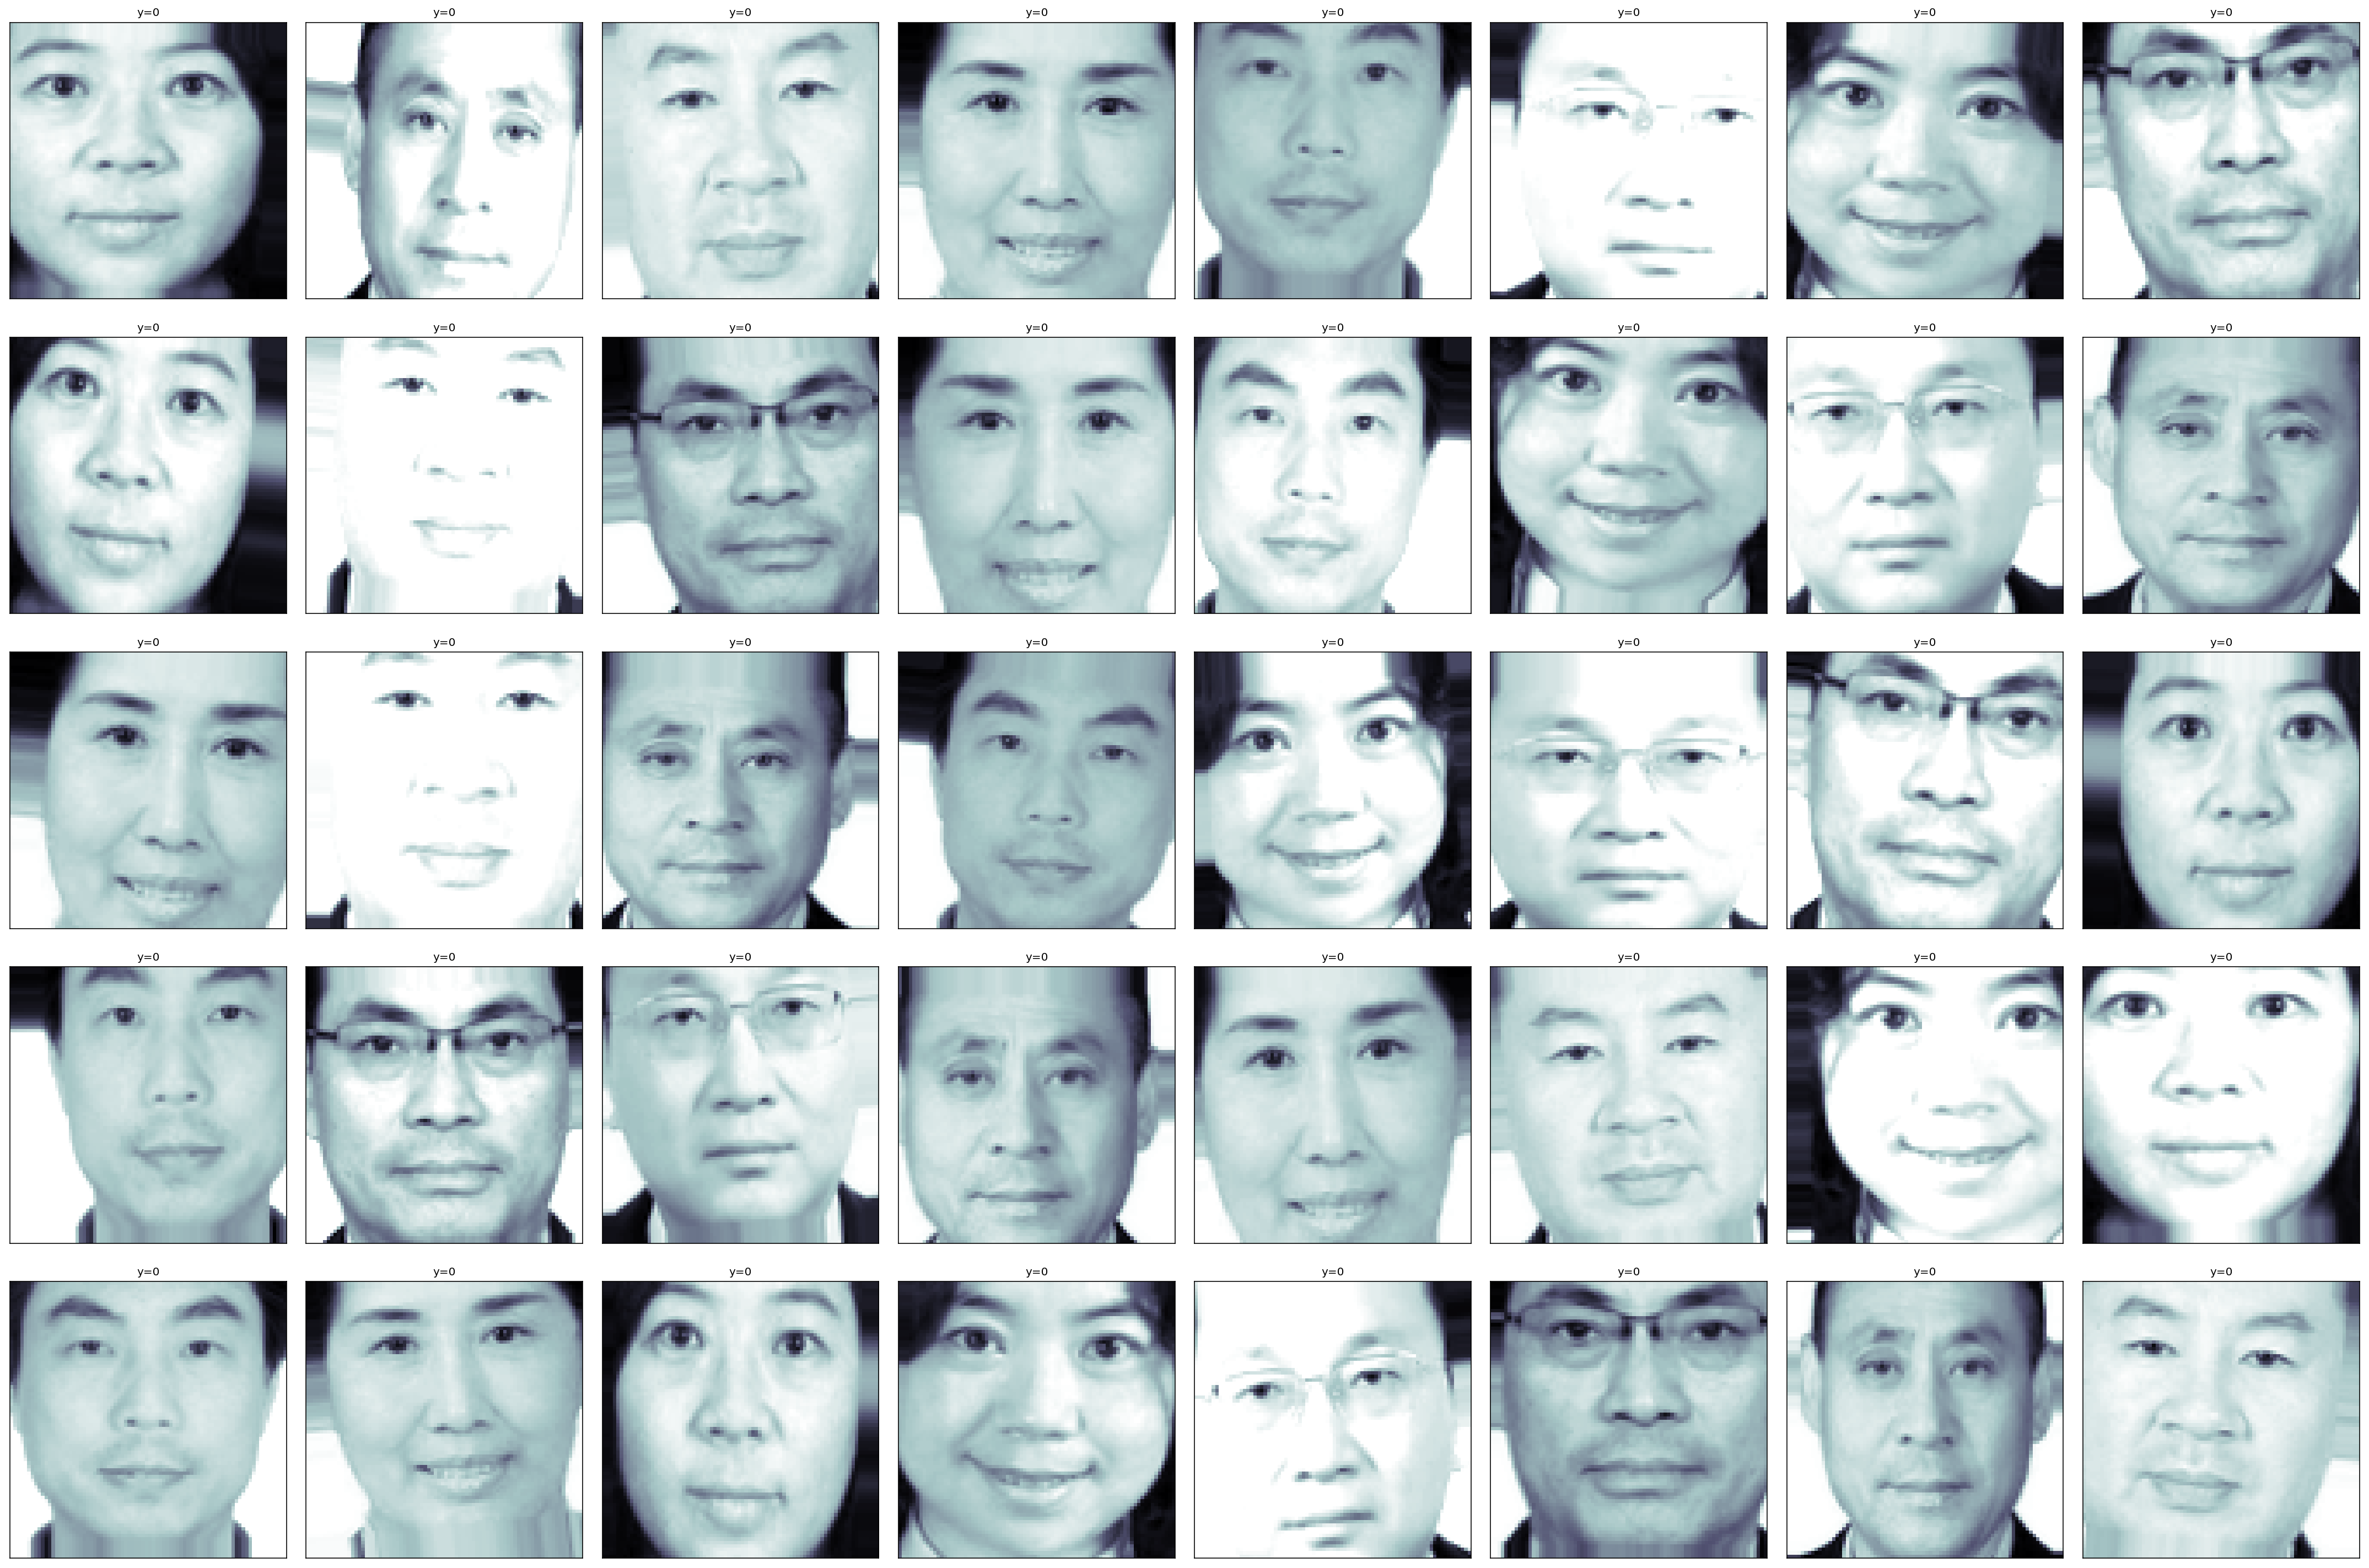

In [18]:
train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range= 7,
    width_shift_range=0.1,
    height_shift_range =0.1,
    brightness_range=[0.5, 1.3],
    horizontal_flip=True)

train_generator.fit(x)

batch_size = 8
iterator = train_generator.flow(x[:batch_size], y[:batch_size], batch_size=batch_size)

np.random.seed(0)
plt.figure(figsize=(30, 20))
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :,0], cmap=mpl.cm.bone)
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [19]:
test_generator = ImageDataGenerator()

train_iterator = train_generator.flow(
    X_train, y_train, batch_size=len(x))

N = 30
X_train_new = []
Y_train_new = []
print('X_train.shape is', X_train.shape)
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

print('Augmented dataset\'s shape is ', X_train_new.shape, Y_train_new.shape)

X_train.shape is (731, 80, 80, 3)
Augmented dataset's shape is  (21930, 80, 80, 3) (21930, 3)


### 데이터를 증가시킨 결과

`훈련데이터 X : (21930, 80, 80, 3)`

`훈련데이터 Y : (21930, 3)`

# Data Preparation for CNN Network


In [20]:
X_train_new = np.transpose(X_train_new, axes = (0,3,1,2))
print('X_train_new.shape : ', X_train_new.shape)
X_test = np.transpose(X_test, axes = (0,3,1,2)) 
print('X_test.shape : ', X_test.shape)


X_train_new.shape :  (21930, 3, 80, 80)
X_test.shape :  (82, 3, 80, 80)


In [21]:
# means = np.mean(X_train_new,axis=(0,2,3),keepdims=True)
# stds = np.std(X_train_new,axis=(0,2,3), keepdims=True)

In [22]:
all_set = np.vstack((X_train_new,X_test))
all_set.shape

(22012, 3, 80, 80)

In [23]:
means = np.array([np.mean(X_train_new[:,0,:,:]),np.mean(X_train_new[:,1,:,:]), np.mean(X_train_new[:,2,:,:])] )
means

array([166.7564 , 133.0851 , 118.28238], dtype=float32)

In [24]:
stds = np.array([np.std(X_train_new[:,0,:,:]),np.std(X_train_new[:,1,:,:]), np.std(X_train_new[:,2,:,:]) ])
stds

array([62.25565 , 58.407127, 57.267498], dtype=float32)

### Train 데이터 normalization

In [25]:
X_train_new = (X_train_new - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]

np.mean(X_train_new[:,0,:,:]), np.std(X_train_new[:,1,:,:])

(3.2757412e-06, 1.000001)

### Test 데이터 normalization

In [26]:
X_test = (X_test - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]
np.mean(X_test[:,0,:,:]), np.std(X_test[:,0,:,:])

(0.33073510910998194, 0.8814347694955669)

In [27]:
X_test.shape, y_test.shape

((82, 3, 80, 80), (82, 3))

### Dataloader
    F.cross_entropy(scores, y) 사용할 때, 정답 y의 shape이 (N,)이길 기대한다.
    따라서, TensorDataset(x,y)에 넣기 전에 정답의 y를 OHE에서 정답 클래스의 indices로 변경한다.

In [28]:
Y_train_new = pd.DataFrame(Y_train_new)
Y_train_new['ans'] = 1
Y_train_new.loc[Y_train_new.loc[:,0] == 1.0, 'ans'] = 0
Y_train_new.loc[Y_train_new.loc[:,1] == 1.0, 'ans'] = 1
Y_train_new.loc[Y_train_new.loc[:,2] == 1.0, 'ans'] = 2


Y_train_new.drop(columns=[0,1,2],axis=1, inplace=True)
print(Y_train_new.head())

Y_train_new = np.array(Y_train_new)
Y_train_new.shape

   ans
0    1
1    0
2    0
3    0
4    1


(21930, 1)

In [29]:
y_test = pd.DataFrame(y_test)
y_test['ans'] = 1
y_test.loc[y_test.loc[:,0] == 1.0, 'ans'] = 0
y_test.loc[y_test.loc[:,1] == 1.0, 'ans'] = 1
y_test.loc[y_test.loc[:,2] == 1.0, 'ans'] = 2

print(y_test.head())

y_test.drop(columns=[0,1,2],axis=1, inplace=True)
y_test.head()

y_test = np.array(y_test)
y_test.shape

     0    1    2  ans
0  0.0  0.0  1.0    2
1  1.0  0.0  0.0    0
2  1.0  0.0  0.0    0
3  0.0  1.0  0.0    1
4  1.0  0.0  0.0    0


(82, 1)

In [30]:
Y_train_new = Y_train_new.reshape(-1)
y_test = y_test.reshape(-1)

    pickle로 베이스 모델 구성할 데이터 저장

In [31]:
if SAVED == False:
    fname_Xaug = 'Xaug.pkl'
    fname_Yaug = 'Yaug.pkl'
    fname_Xtest = 'Xtest.pkl'
    fname_Ytest = 'Ytest.pkl'
    pickle.dump(X_train_new, open(fname_Xaug,'wb'),)
    pickle.dump(Y_train_new, open(fname_Yaug,'wb'),)
    pickle.dump(X_test, open(fname_Xtest,'wb'),)
    pickle.dump(y_test, open(fname_Ytest,'wb'),)
    SAVED = True
else :
    pass

NameError: name 'SAVED' is not defined

        DataLoader(TensorDataset(x,y), **args)로 데이터 준비

In [ ]:
LOADED = False
if LOADED == False:
    fname_Xaug = 'Xaug.pkl'
    fname_Yaug = 'Yaug.pkl'
    fname_Xtest = 'Xtest.pkl'
    fname_Ytest = 'Ytest.pkl'
    X_train_new = pickle.load(open(fname_Xaug,'rb'),)
    Y_train_new = pickle.load(open(fname_Yaug,'rb'),)
    X_test = pickle.load(open(fname_Xtest,'rb'),)
    y_test = pickle.load(open(fname_Ytest,'rb'),)
    LOADED = True
else :
    pass

In [ ]:
a = torch.from_numpy(X_train_new) 
b = torch.from_numpy(Y_train_new)
train_data = TensorDataset(a, b)

NUM_TRAIN = 20000
train_loader = DataLoader(train_data,batch_size= 64, sampler = sampler.SubsetRandomSampler(range(NUM_TRAIN)))
val_loader = DataLoader(train_data,batch_size= 64, sampler = sampler.SubsetRandomSampler(range(NUM_TRAIN,21930)))

c = torch.from_numpy(X_test) 
d = torch.from_numpy(y_test)
test_data = TensorDataset(c, d)
test_loader = DataLoader(test_data,batch_size= 64)


### device 설정, print 주기 설정

In [ ]:
USE_GPU = True
if USE_GPU == True and torch.cuda.is_available() == True :
    device = torch.device('cuda')
else : 
    device = torch.device('cpu')
    
dtype = torch.float32
print_every = 100
print('device is ', device)

# model
     A 4-layer convolutional network
    (conv -> batchnorm -> relu -> maxpool) * 3 -> fc

In [ ]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator. 
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU. 
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

In [ ]:
layer1 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=5, padding=2),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

layer2 = nn.Sequential(
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

layer3 = nn.Sequential(
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

fc = nn.Linear(64*10*10, 3)


def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d :
        random_weight(m.weight.size())
        zero_weight(m.bias.size())
        

model = nn.Sequential(
    layer1,
    layer2,
    layer3,
    Flatten(),
    fc
)
model.apply(init_weights)

In [ ]:
def flatten(x):
    '''input : x --> return flattened x'''
    N = x.shape[0]
    return x.view(N,-1)
class Flatten(nn.Module):
    def forward(self,x):
        return flatten(x)

In [ ]:
def check_accuracy(loader, model, data = 'val'):
    if data == 'val':
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    y_actu = []
    y_pred = []
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            if data != 'val':
                y_pred.append(preds)
                y_actu.append(y)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        
    return y_actu, y_pred

In [ ]:
def train(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
#             print(scores)
#             print(y)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy(val_loader, model)
                print()

# 훈련

In [ ]:
learning_rate = 1e-3

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print training status every epoch: set print_every to a large number
print_every = 100


train(model,optimizer,epochs=3)

# 결과 시각화

In [ ]:
from pycm import *

y_actu, y_pred = check_accuracy(test_loader, model, data = 'test')

In [ ]:
y_actu[-18:], y_pred[-18:]

In [ ]:
y_actu[0] = y_actu[0].numpy()
y_actu[1] = y_actu[1].numpy()
y_actu = np.hstack((y_actu[0],y_actu[1]))

y_pred[0] = y_pred[0].numpy()
y_pred[1] = y_pred[1].numpy()
y_pred = np.hstack((y_pred[0],y_pred[1]))

In [ ]:
cls2ethnicity = {0:'CHINESE', 1:'JAPANESE', 2:'KOREAN'}

plt.figure(figsize=(40, 30))
for i,(x_mb,y_mb) in enumerate(test_loader):
#     print(x,y)
    if i == 1 :
        for j,(x,y) in enumerate(zip(x_mb,y_mb)):
            plt.subplot(3, 6, j + 1)
#             print(x.shape)
            plt.imshow(x[0, :, :], cmap=mpl.cm.bone)
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])

            plt.title('%s' % cls2ethnicity[y_actu[-18:][j]] +' ->' + cls2ethnicity[y_pred[-18:][j]], fontsize=25)
    else :
        continue
plt.tight_layout()
plt.show()

# 결과 통계치 

In [ ]:
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred)

cm.relabel(mapping={0:"중국인",1:"일본인",2:"한국인"})
cm.table

In [ ]:
print(cm)

# 실제 사람들에 대한 TEST

In [ ]:
means = np.array([167.14023 , 133.39897 , 118.541534])

stds = np.array([62.230347, 58.427975, 57.24644 ])

In [ ]:
friends = np.loadtxt('friends.txt', dtype=int)

friends = friends.reshape(4,3,80,80)

In [ ]:
friends_ = np.copy(friends)

In [ ]:
plt.figure(figsize=(20, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(friends_[i, 0, :, :], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
friends_ = (friends_ - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]
np.mean(friends_[:,0,:,:]), np.std(friends_[:,0,:,:])

In [ ]:
friends_ = torch.from_numpy(friends_)

cls2ethnicity = {0:'CHINESE', 1:'JAPANESE', 2:'KOREAN'}
friends_ = friends_.to(device=device, dtype=dtype)
scores = model(friends_)
_, preds = scores.max(1)
preds = preds.numpy()

result = []
for idx,cls in enumerate(preds):
    result.append(cls2ethnicity[cls])
result

In [ ]:
plt.figure(figsize=(20, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)  
    plt.imshow(friends_[i, 0, :, :], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('%s'% result[i])
plt.tight_layout()
plt.show()

# Gradient - visualization  -- 실패;;

In [ ]:
import sys
get_example_params = reload(sys.modules[get_example_params.__module__])
GuidedBackprop = reload(sys.modules[GuidedBackprop.__module__])
# misc_functions = 

from guided_backprop import GuidedBackprop

from misc_functions import (get_example_params,
                            convert_to_grayscale,
                            save_gradient_images,
                            get_positive_negative_saliency)
from importlib import reload

if __name__ == '__main__':
    target_example = 2  # Snake
    (original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
        get_example_params(target_example, model)
    print(original_image,)
    # Guided backprop
    GBP = GuidedBackprop(pretrained_model)
    # Get gradients
    guided_grads = GBP.generate_gradients(prep_img, target_class)
    # Save colored gradients
    save_gradient_images(guided_grads, file_name_to_export + '_Guided_BP_color')
    # Convert to grayscale
    print(guided_grads)
    grayscale_guided_grads = convert_to_grayscale(guided_grads)
    # Save grayscale gradients
#     print(grayscale_guided_grads)
    save_gradient_images(grayscale_guided_grads, file_name_to_export + '_Guided_BP_gray')
    # Positive and negative saliency maps
    pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
    save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
    save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
    print('Guided backprop completed')

model._modules

